# Clustering Analysis

The data contains two columns x1 & x2 on which clustering has to be performed.  

## Task:
Perform Clustering on the data and find cluster properties

### Importing CSV

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
import numpy as np

df = pd.read_csv('clustering data.csv')
df.max()

x1    4.4
x2    2.5
dtype: float64

### Visualizing relation between x1 and x2 using Scatter Plot

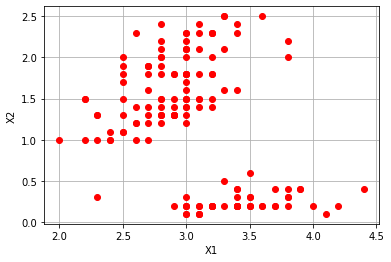

In [9]:
%matplotlib inline
plt.plot(df["x1"],df["x2"],"ro")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()

### Building k-Means model and visualizing the clusters

In [10]:
kmeans=KMeans(n_clusters=2,init='random')
model=kmeans.fit(df)
y_kmeans=model.predict(df)
c=kmeans.cluster_centers_
print("Clusters are",c)
print(y_kmeans)

Clusters are [[3.418 0.244]
 [2.872 1.676]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


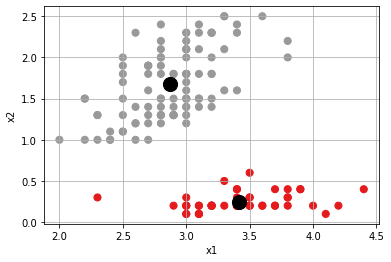

In [11]:
plt.scatter(df['x1'],df['x2'],c=y_kmeans,s=50,cmap='Set1')
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',s=200)
plt.xlabel("x1")
plt.ylabel("x2")
plt.matplotlib.patches.CirclePolygon((c[0][0],c[0][1]),radius=5,resolution=20,color='r')

### Finding mean distance in each cluster from centroid

In [12]:
c0_c=c[0]
c1_c=c[1]
cluster1_p=df[y_kmeans==0]
cluster2_p=df[y_kmeans==1]

import numpy as np
c1_d=cluster1_p.apply(lambda x:np.sqrt((x[0]-c0_c[0])**2+(x[1]-c0_c[1])**2),axis=1)
c2_d=cluster2_p.apply(lambda x:np.sqrt((x[0]-c1_c[0])**2+(x[1]-c1_c[1])**2),axis=1)
print(c1_d.mean())
print(c2_d.mean())

0.3164973377229503
0.47900632388080894


### SSE

In [13]:
model.inertia_

36.50100000000001

### Line from centroid to point with max distance

c:\users\nihaa\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


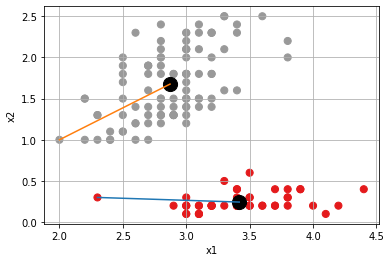

In [14]:
f_point1 = cluster1_p[c1_d.apply(lambda x: x == c1_d.max())]
f_point2 = cluster2_p[c2_d.apply(lambda x: x == c2_d.max())]
plt.scatter(df['x1'],df['x2'],c=y_kmeans,s=50,cmap='Set1')
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',s=200)
plt.xlabel("x1")
plt.ylabel("x2")
plt.matplotlib.patches.CirclePolygon((c[0][0],c[0][1]),radius=5,resolution=20,color='r')
plt.plot([c0_c[0],f_point1.x1],[c0_c[1],f_point1.x2])
plt.plot([c1_c[0],f_point2.x1],[c1_c[1],f_point2.x2])
plt.show()